In [1]:
#import libraries
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
#read geometry data from csv

counties_shp = gpd.read_file('mapdata201907311006/COUNTY_MOI_1080726.shp',encoding='utf-8')
countynames = counties_shp['COUNTYNAME']


In [3]:
#Find all files in certain category

path  = "company"
files=[]
for r,d,f in os.walk(path):
    for file in f:
        files.append(os.path.join(r,file))

company_data = pd.DataFrame()

In [4]:
list_of_years=[]
for f in files:
    year_month = f[-10:-4]
    list_of_years.append(year_month)
    company_data = pd.read_csv(f)
    company_data = company_data.drop(company_data.columns[[0,1,2,4]],axis=1)
    company_data['公司所在地']=company_data['公司所在地'].apply(lambda t: t[:3])
    MoneyDic={'County':[],year_month:[]}
    for c in countynames:
        count = 0.0 # in million
        for index, row in company_data.iterrows():
            if row[0] == c :
                count += (float)(row[1])/1000000.0
        MoneyDic['County'].append(c)
        MoneyDic[year_month].append(round(count,2))
    #print(MoneyDic)
    money_merge = pd.DataFrame(MoneyDic)
    counties_shp=counties_shp.merge(money_merge,left_on=('COUNTYNAME'),right_on=('County'))
    print(year_month)
    #counties_shp

2013_2
2013_3
2013_6
2013_4
2013_5


In [5]:
# save all the maps in the charts folder
output_path = 'charts'

# counter for the for loop
i = 0

# set the min and max range for the choropleth map
vmin, vmax = 0, 10000
print(list_of_years)

['2013_2', '2013_3', '2013_6', '2013_4', '2013_5']


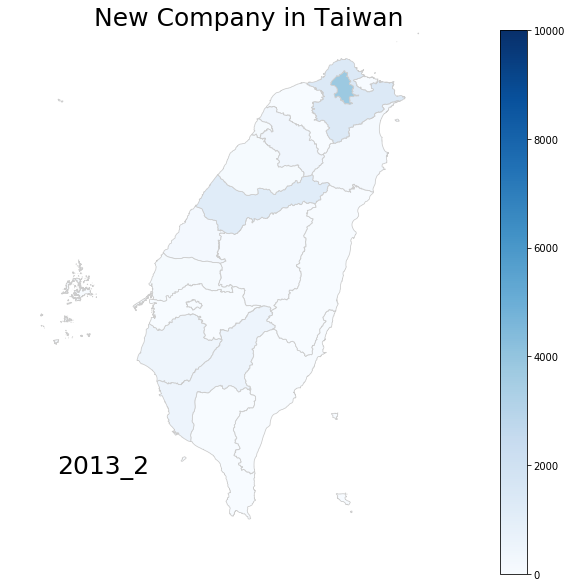

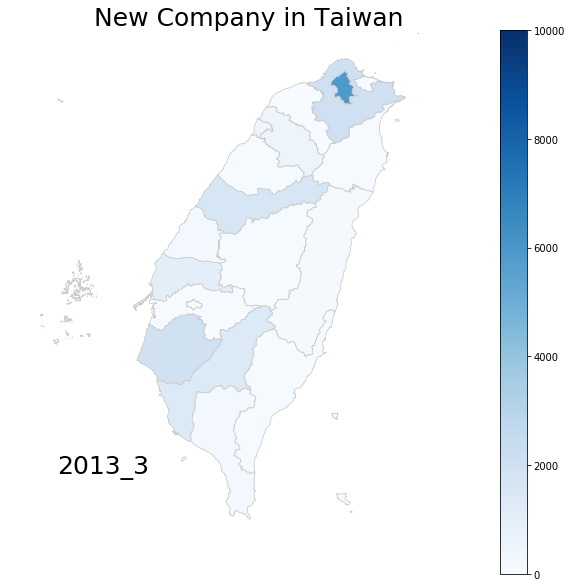

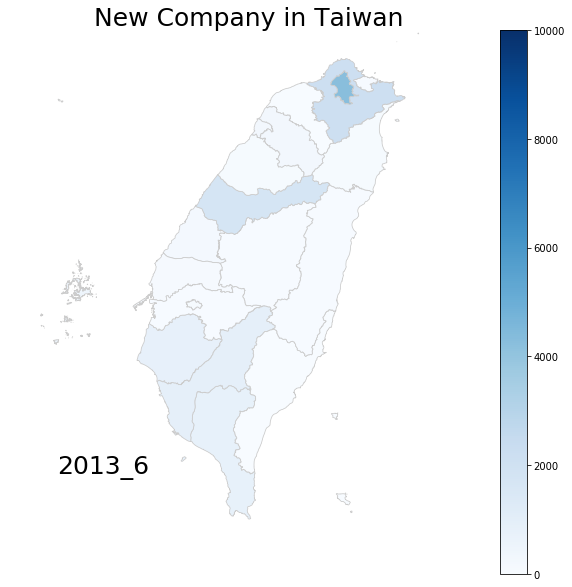

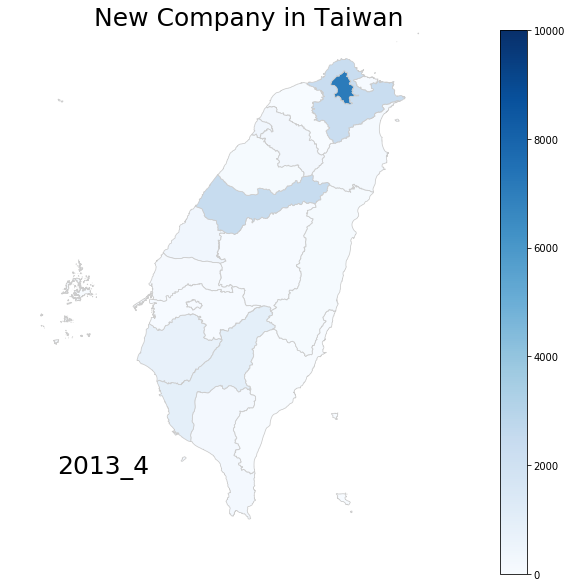

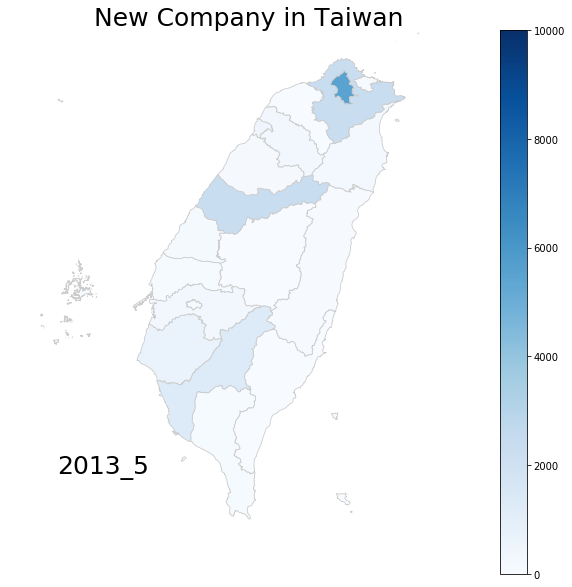

In [8]:
# start the for loop to create one map per year
for year in list_of_years:
    fig = counties_shp.plot(column=year, cmap='Blues', figsize=(10,10), linewidth=0.8, edgecolor='0.8', vmin=vmin, vmax=vmax, legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    ax = fig.axis((119.2,122.5,21.5,25.5))
    # remove axis of chart
    fig.axis('off')
    # add a title
    fig.set_title('New Company in Taiwan', \
              fontdict={'fontsize': '25',
                         'fontweight' : '3'})
    fig.annotate(year,
            xy=(0.1, .225), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=25)
    # this will save the figure as a high-res png in the output path. you can also save as svg if you prefer.
    filepath = os.path.join(output_path, year+'_company.png')
    chart = fig.get_figure()
    chart.savefig(filepath, dpi=300)


In [9]:
#import sys
#!{sys.executable} -m pip install imageio
import imageio
path  = "charts"
imagefile_list = []
for r,d,f in os.walk(path):
    for file in f:
        imagefile_list.append(os.path.join(r,file))
sorted_imagefile_list=sorted(imagefile_list)
images = []
for filename in sorted_imagefile_list:
    #print(filename[-3:])
    if filename[-3:] == "png":
        images.append(imageio.imread(filename))


In [10]:
imageio.mimsave('company.gif', images)